In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os 
import sys

from astropy import units as u
from astropy.coordinates import EarthLocation, SkyCoord
from astropy.time import Time

from astroplan.plots import plot_airmass, plot_sky, plot_sky_24hr, plot_finder_image
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

from astroplan import Observer

from panoptes.pocs.core import POCS
from panoptes.pocs.observatory import Observatory

from panoptes.pocs.scheduler import create_scheduler_from_config

from panoptes.utils.config import client
from panoptes.utils.config import server
from panoptes.utils import listify
from panoptes.utils.horizon import Horizon

from panoptes.pocs.utils.logger import get_logger, LOGGER_INFO
logger = get_logger()
logger.enable('panoptes')

In [3]:
# Get a location
loc = client.get_config('location')
location = EarthLocation(lon=loc['longitude'], lat=loc['latitude'], height=loc['elevation'])
print(location)

#Get an observer at the location
observer = Observer(location=location)
print(observer)

# Create a horizon line
points = [
    [[40, 30], [40, 75]],  # From 30°-75° east there is an obstruction at 40° altitude
    [[50, -60], [40, -30]] # From 60°-30° west there is an obstruction sloping from 50° to 40° altitude
]
horizon = Horizon(points)

# Get the night hours (you can use observer.tonight())
times = observer.tonight(horizon=-18 * u.degree)
start_of_night = times[0]
end_of_night = times[1]
# start_of_night = Time('2016-08-13 10:00:00')
# end_of_night = Time('2016-08-13 16:00:00')

2020-06-16 17:41:48.004 | DEBUG    | panoptes.utils.config.client:get_config:71 - Received config {"elevation":"3400.0 m","flat_horizon":"-6.0 deg","focus_horizon":"-12.0 deg","gmt_offset":-600,"horizon":"35 deg","latitude":"19.54 deg","longitude":"-155.58 deg","name":"Mauna Loa Observatory","obsctructions":[],"observe_horizon":"-18.0 deg","timezone":"US/Hawaii"}

2020-06-16 17:41:48.014 | DEBUG    | panoptes.utils.config.client:get_config:73 - Parsing config results
2020-06-16 17:41:48.027 | INFO     | panoptes.utils.config.client:get_config:82 - Config key=location: config_entry={'elevation': <Quantity 3400. m>, 'flat_horizon': <Quantity -6. deg>, 'focus_horizon': <Quantity -12. deg>, 'gmt_offset': -600, 'horizon': <Quantity 35. deg>, 'latitude': <Quantity 19.54 deg>, 'longitude': <Quantity -155.58 deg>, 'name': 'Mauna Loa Observatory', 'obsctructions': [], 'observe_horizon': <Quantity -18. deg>, 'timezone': 'US/Hawaii'}


(-5478046.23697881, -2487258.02090963, 2120912.92046144) m
<Observer: location (lon, lat, el)=(-155.58 deg, 19.539999999999992 deg, 3400.0000000009422 m),
    timezone=<UTC>>



>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]


In [4]:
# Create a scheduler
scheduler = create_scheduler_from_config()

2020-06-16 17:41:51.641 | DEBUG    | panoptes.utils.config.client:get_config:71 - Received config {"check_file":true,"fields_file":"simple.yaml","type":"dispatch"}

2020-06-16 17:41:51.646 | DEBUG    | panoptes.utils.config.client:get_config:73 - Parsing config results
2020-06-16 17:41:51.653 | INFO     | panoptes.utils.config.client:get_config:82 - Config key=scheduler: config_entry={'check_file': True, 'fields_file': 'simple.yaml', 'type': 'dispatch'}
2020-06-16 17:41:51.657 | INFO     | panoptes.pocs.scheduler:create_scheduler_from_config:25 - scheduler_config: {'check_file': True, 'fields_file': 'simple.yaml', 'type': 'dispatch'}
2020-06-16 17:41:51.665 | DEBUG    | panoptes.pocs.scheduler:create_scheduler_from_config:32 - No Observer provided, creating from config.
2020-06-16 17:41:51.669 | DEBUG    | panoptes.pocs.utils.location:create_location_from_config:27 - Setting up site details
2020-06-16 17:41:51.681 | DEBUG    | panoptes.utils.config.client:get_config:71 - Received confi

In [5]:
for obs in scheduler.observations.values():
    print(obs)

Kepler 488: 120.0 s exposures in blocks of 10, minimum 60, priority 125
Kepler 1100: 120.0 s exposures in blocks of 10, minimum 60, priority 125
KIC 8462852: 120.0 s exposures in blocks of 10, minimum 60, priority 200
HD 23630: 120.0 s exposures in blocks of 10, minimum 60, priority 100
HD 189733: 100.0 s exposures in blocks of 10, minimum 60, priority 105
HD 209458: 120.0 s exposures in blocks of 10, minimum 60, priority 100
Wasp 140: 120.0 s exposures in blocks of 10, minimum 60, priority 100
Wasp 104: 120.0 s exposures in blocks of 10, minimum 60, priority 100
Wasp 44: 120.0 s exposures in blocks of 10, minimum 60, priority 100
Wasp 2: 120.0 s exposures in blocks of 10, minimum 60, priority 100
Wasp 24: 120.0 s exposures in blocks of 10, minimum 60, priority 100
Wasp 77: 120.0 s exposures in blocks of 10, minimum 60, priority 100
Wasp 33: 120.0 s exposures in blocks of 10, minimum 60, priority 100
Wasp 43: 120.0 s exposures in blocks of 10, minimum 60, priority 100
Wasp 36: 120.0 s 

In [6]:
# Get the best observations for the given time
# show_all returns entire list along with merit
best = scheduler.get_observation(time=start_of_night, show_all=True)

for b in listify(best):
    print("Field: {:12s} Merit: {}".format(b[0], b[1])) #What is merit?

2020-06-16 17:43:20.075 | DEBUG    | panoptes.utils.config.client:get_config:71 - Received config "-18.0 deg"

2020-06-16 17:43:20.084 | DEBUG    | panoptes.utils.config.client:get_config:73 - Parsing config results
2020-06-16 17:43:20.090 | INFO     | panoptes.utils.config.client:get_config:82 - Config key=location.observe_horizon: config_entry=-18.0 deg
2020-06-16 17:43:21.004 | INFO     | panoptes.pocs.scheduler.dispatch:get_observation:39 - Checking Constraint: Altitude
2020-06-16 17:43:21.007 | DEBUG    | panoptes.pocs.scheduler.dispatch:get_observation:43 - 	Kepler 488	Current score: 0.000
2020-06-16 17:43:21.112 | DEBUG    | panoptes.pocs.scheduler.constraint:get_score:64 - Minimum altitude for az = 44.73 alt = 23.55 < 35.00
2020-06-16 17:43:21.115 | DEBUG    | panoptes.pocs.scheduler.constraint:get_score:66 - Below minimum altitude: 23.55 < 35.00
2020-06-16 17:43:21.120 | DEBUG    | panoptes.pocs.scheduler.dispatch:get_observation:50 - 		Constraint Score: 0.000	Veto: True
2020-

Field: HAT-P-36     Merit: 338.8965282221394


In [7]:
scheduler.current_observation.field.coord.equinox

<Time object: scale='tt' format='jyear_str' value=J2000.000>


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]


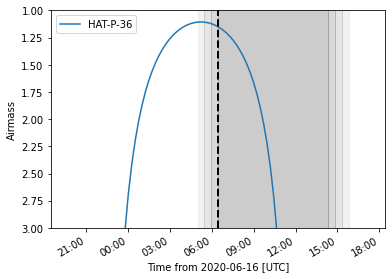

In [8]:
plot_airmass([scheduler.observations[name].field for name, merit in best], 
             scheduler.observer, start_of_night, 
             brightness_shading=True)
        
plt.axvline(start_of_night.plot_date, lw=2, ls='--', c='k')    
plt.legend(loc=2)
plt.show()

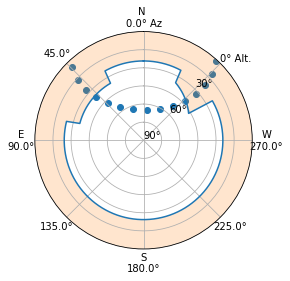

In [9]:
ax = plot_sky_24hr(scheduler.current_observation.field, scheduler.observer, start_of_night)

# Show horizon

# Scale from 0 - 100 where 100 = 0° and 0 = 90°
y = (100 - (horizon.horizon_line * 100) / 90)
# 0 - 2π spread across 360
x = np.linspace(0, 2 * np.pi, 360)
ax.plot(x, y)
ax.fill_between(x, y, 100, alpha=0.2)

plt.show()

In [10]:
# Set a later time to start
t2 = end_of_night - 3 * u.hour

# Get the best observation for the given time
# show_all returns entire list along with merit
best = scheduler.get_observation(show_all=True, time=t2)

for b in listify(best):
    print("Field: {:12s} Merit: {}".format(b[0], b[1]))

2020-06-16 17:43:45.895 | DEBUG    | panoptes.utils.config.client:get_config:71 - Received config "-18.0 deg"

2020-06-16 17:43:45.899 | DEBUG    | panoptes.utils.config.client:get_config:73 - Parsing config results
2020-06-16 17:43:45.917 | INFO     | panoptes.utils.config.client:get_config:82 - Config key=location.observe_horizon: config_entry=-18.0 deg

>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]
2020-06-16 17:43:46.759 | INFO     | panoptes.pocs.scheduler.dispatch:get_observation:39 - Checking Constraint: Altitude
2020-06-16 17:43:46.762 | DEBUG    | panoptes.pocs.scheduler.dispatch:get_observation:43 - 	Kepler 488	Current score: 0.000
2020-06-16 17:43:46.869 | DEBUG    | panoptes.pocs.scheduler.constraint:get_score:64 - Minimum altitude for az = 3.29 alt = 61.11 < 35.00
2020-06-16 17:43:46.873 | DEBUG    | panoptes.pocs.scheduler.dispatch:get_observation:50 - 		Constraint Score: 1.000	Veto: False
2020-06-16 17:43:46.878 | DEBUG    | panoptes.

Field: Wasp 24      Merit: 691.7561687274377
Field: Tres 3       Merit: 663.713220196653
Field: HD 209458    Merit: 638.1985238452138



>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]


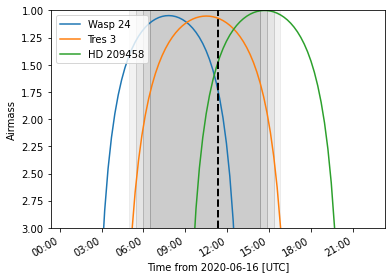

In [11]:
plot_airmass([scheduler.observations[name].field for name, merit in best], 
             scheduler.observer, t2, 
             brightness_shading=True)
plt.axvline(t2.plot_date, lw=2, ls='--', c='k')
plt.legend(loc=2)
plt.show()

## Entire Night Simulation

Now let's simulate going through the whole evening

In [ ]:
# Start at the beginning of the night
next_time = start_of_night
print("Start of night at {}".format(start_of_night.isot))

# Reset scheduler
# Create a scheduler
scheduler = create_scheduler_from_config()

while (next_time < end_of_night):    
    # Only get new target if we have met min_nexp for observation
    if (scheduler.current_observation is None) or (scheduler.current_observation.current_exp >= scheduler.current_observation.min_nexp):
        
        print("Getting new observation at {}".format(next_time.isot))
        new_obs = scheduler.get_observation(time=next_time)
        
    if scheduler.current_observation is not None:

        if (scheduler.current_observation.current_exp_num < scheduler.current_observation.min_nexp):
            obs_duration = scheduler.current_observation.minimum_duration
           
            # Fake the exposure count
            scheduler.current_observation.current_exp = scheduler.current_observation.min_nexp
        else:
            obs_duration = scheduler.current_observation.set_duration
    
            # Fake the exposure count
            scheduler.current_observation.current_exp += scheduler.current_observation.exp_set_size

        print("\tWill observe {} with merit of {:0.5f} for {}".format(
                    scheduler.current_observation.name, 
                    scheduler.current_observation.merit, 
                    obs_duration))
        print("\t{} of {}".format(scheduler.current_observation.current_exp, 
                                  scheduler.current_observation.min_nexp))
                
    next_time = next_time + obs_duration
    
print("End of night at {}".format(end_of_night.isot))

2020-06-16 17:44:11.349 | DEBUG    | panoptes.utils.config.client:get_config:71 - Received config {"check_file":true,"fields_file":"simple.yaml","type":"dispatch"}

2020-06-16 17:44:11.359 | DEBUG    | panoptes.utils.config.client:get_config:73 - Parsing config results
2020-06-16 17:44:11.365 | INFO     | panoptes.utils.config.client:get_config:82 - Config key=scheduler: config_entry={'check_file': True, 'fields_file': 'simple.yaml', 'type': 'dispatch'}
2020-06-16 17:44:11.374 | INFO     | panoptes.pocs.scheduler:create_scheduler_from_config:25 - scheduler_config: {'check_file': True, 'fields_file': 'simple.yaml', 'type': 'dispatch'}
2020-06-16 17:44:11.379 | DEBUG    | panoptes.pocs.scheduler:create_scheduler_from_config:32 - No Observer provided, creating from config.
2020-06-16 17:44:11.388 | DEBUG    | panoptes.pocs.utils.location:create_location_from_config:27 - Setting up site details
2020-06-16 17:44:11.404 | DEBUG    | panoptes.utils.config.client:get_config:71 - Received confi

Start of night at 2020-06-17T06:26:09.626


2020-06-16 17:44:11.557 | DEBUG    | panoptes.utils.config.client:get_config:71 - Received config "file"

2020-06-16 17:44:11.564 | DEBUG    | panoptes.utils.config.client:get_config:73 - Parsing config results
2020-06-16 17:44:11.569 | INFO     | panoptes.utils.config.client:get_config:82 - Config key=db.type: config_entry=file
2020-06-16 17:44:11.596 | DEBUG    | panoptes.utils.config.client:get_config:71 - Received config "panoptes"

2020-06-16 17:44:11.601 | DEBUG    | panoptes.utils.config.client:get_config:73 - Parsing config results
2020-06-16 17:44:11.606 | INFO     | panoptes.utils.config.client:get_config:82 - Config key=db.name: config_entry=panoptes
2020-06-16 17:44:11.612 | INFO     | panoptes.utils.database.base:__init__:55 - Creating PanDB panoptes
2020-06-16 17:44:11.630 | DEBUG    | panoptes.utils.config.client:get_config:71 - Received config "file"

2020-06-16 17:44:11.640 | DEBUG    | panoptes.utils.config.client:get_config:73 - Parsing config results
2020-06-16 17:4

Getting new observation at 2020-06-17T06:26:09.626


2020-06-16 17:44:25.307 | INFO     | panoptes.pocs.scheduler.dispatch:get_observation:39 - Checking Constraint: Altitude
2020-06-16 17:44:25.310 | DEBUG    | panoptes.pocs.scheduler.dispatch:get_observation:43 - 	Kepler 488	Current score: 0.000
2020-06-16 17:44:25.375 | DEBUG    | panoptes.pocs.scheduler.constraint:get_score:64 - Minimum altitude for az = 44.73 alt = 23.55 < 35.00
2020-06-16 17:44:25.380 | DEBUG    | panoptes.pocs.scheduler.constraint:get_score:66 - Below minimum altitude: 23.55 < 35.00
2020-06-16 17:44:25.384 | DEBUG    | panoptes.pocs.scheduler.dispatch:get_observation:50 - 		Constraint Score: 0.000	Veto: True
2020-06-16 17:44:25.394 | DEBUG    | panoptes.pocs.scheduler.dispatch:get_observation:53 - 		Vetoed by Altitude
2020-06-16 17:44:25.401 | DEBUG    | panoptes.pocs.scheduler.dispatch:get_observation:43 - 	Kepler 1100	Current score: 0.000
2020-06-16 17:44:25.528 | DEBUG    | panoptes.pocs.scheduler.constraint:get_score:64 - Minimum altitude for az = 48.37 alt = 1

	Will observe HAT-P-36 with merit of 338.89653 for 7200.0 s
	60 of 60
Getting new observation at 2020-06-17T08:26:09.626


2020-06-16 17:44:34.870 | INFO     | panoptes.pocs.scheduler.dispatch:get_observation:39 - Checking Constraint: Altitude
2020-06-16 17:44:34.874 | DEBUG    | panoptes.pocs.scheduler.dispatch:get_observation:43 - 	Kepler 488	Current score: 0.000
2020-06-16 17:44:34.939 | DEBUG    | panoptes.pocs.scheduler.constraint:get_score:64 - Minimum altitude for az = 41.02 alt = 43.17 < 35.00
2020-06-16 17:44:34.943 | DEBUG    | panoptes.pocs.scheduler.dispatch:get_observation:50 - 		Constraint Score: 1.000	Veto: False
2020-06-16 17:44:34.946 | DEBUG    | panoptes.pocs.scheduler.dispatch:get_observation:58 - 		Total score: 1.000
2020-06-16 17:44:34.951 | DEBUG    | panoptes.pocs.scheduler.dispatch:get_observation:43 - 	Kepler 1100	Current score: 0.000
2020-06-16 17:44:35.016 | DEBUG    | panoptes.pocs.scheduler.constraint:get_score:64 - Minimum altitude for az = 48.60 alt = 38.36 < 35.00
2020-06-16 17:44:35.020 | DEBUG    | panoptes.pocs.scheduler.dispatch:get_observation:50 - 		Constraint Score: 

	Will observe Kepler 488 with merit of 818.73315 for 7200.0 s
	60 of 60
Getting new observation at 2020-06-17T10:26:09.626


2020-06-16 17:44:46.138 | INFO     | panoptes.pocs.scheduler.dispatch:get_observation:39 - Checking Constraint: Altitude
2020-06-16 17:44:46.141 | DEBUG    | panoptes.pocs.scheduler.dispatch:get_observation:43 - 	Kepler 488	Current score: 0.000
2020-06-16 17:44:46.252 | DEBUG    | panoptes.pocs.scheduler.constraint:get_score:64 - Minimum altitude for az = 20.48 alt = 58.40 < 35.00
2020-06-16 17:44:46.258 | DEBUG    | panoptes.pocs.scheduler.dispatch:get_observation:50 - 		Constraint Score: 1.000	Veto: False
2020-06-16 17:44:46.265 | DEBUG    | panoptes.pocs.scheduler.dispatch:get_observation:58 - 		Total score: 1.000
2020-06-16 17:44:46.271 | DEBUG    | panoptes.pocs.scheduler.dispatch:get_observation:43 - 	Kepler 1100	Current score: 0.000
2020-06-16 17:44:46.341 | DEBUG    | panoptes.pocs.scheduler.constraint:get_score:64 - Minimum altitude for az = 34.62 alt = 57.80 < 35.00
2020-06-16 17:44:46.345 | DEBUG    | panoptes.pocs.scheduler.dispatch:get_observation:50 - 		Constraint Score: 

	Will observe KIC 8462852 with merit of 1298.89419 for 7200.0 s
	60 of 60
Getting new observation at 2020-06-17T12:26:09.626


2020-06-16 17:45:00.584 | INFO     | panoptes.pocs.scheduler.dispatch:get_observation:39 - Checking Constraint: Altitude
2020-06-16 17:45:00.587 | DEBUG    | panoptes.pocs.scheduler.dispatch:get_observation:43 - 	Kepler 488	Current score: 0.000
2020-06-16 17:45:00.696 | DEBUG    | panoptes.pocs.scheduler.constraint:get_score:64 - Minimum altitude for az = 341.72 alt = 59.01 < 35.00
2020-06-16 17:45:00.705 | DEBUG    | panoptes.pocs.scheduler.dispatch:get_observation:50 - 		Constraint Score: 1.000	Veto: False
2020-06-16 17:45:00.710 | DEBUG    | panoptes.pocs.scheduler.dispatch:get_observation:58 - 		Total score: 1.000
2020-06-16 17:45:00.715 | DEBUG    | panoptes.pocs.scheduler.dispatch:get_observation:43 - 	Kepler 1100	Current score: 0.000
2020-06-16 17:45:00.854 | DEBUG    | panoptes.pocs.scheduler.constraint:get_score:64 - Minimum altitude for az = 351.23 alt = 65.04 < 35.00
2020-06-16 17:45:00.857 | DEBUG    | panoptes.pocs.scheduler.dispatch:get_observation:50 - 		Constraint Score

In [ ]:
time = Time('2016-08-13 8:00:00')
scheduler.get_observation(time=time)
print(scheduler.current_observation)

time = Time('2016-08-13 15:00:00')
scheduler.get_observation(time=time)
print(scheduler.current_observation)

time = Time('2016-08-13 17:30:00')
scheduler.get_observation(time=time)
print(scheduler.current_observation)

In [ ]:
print(scheduler.current_observation)